In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Reading in the data

In [26]:
with open('PopulationData.csv', 'r') as f:
    lines = f.readlines()
world_data = lines[218].strip('\n')
world_data = world_data.split(',')
world_data = world_data[5:]
for i in range(len(world_data)):
    world_data[i] = float(world_data[i].replace('"', ''))

## Formatting the data

In [27]:
years = list(range(1960, 2021))
years = np.array(years).reshape(-1, 1)
world_data = np.array(world_data)

years1d = []
worldData1d = []

for i in range (len(years)):
    years1d.append(years[i][0])

for i in range (len(world_data)):
    worldData1d.append(world_data[i])

## Creating the model

In [28]:
polyModel = np.poly1d(np.polyfit(years1d, worldData1d, 3))
r_sc = r2_score(world_data, polyModel(years))
print("r-squared: " + str(r_sc))
pop = polyModel(2122)
print("Population Estimate in 2122: " + str(round(pop)))

r-squared: 0.9999094449058586
Population Estimate in 2122: 7265750433


In [29]:
years = list(range(1960, 2123))
predicted_data = []
for i in range(2021, 2123):
    predicted_data.append(polyModel(i))
world_data = list(world_data)

In [30]:
## Plotting the data

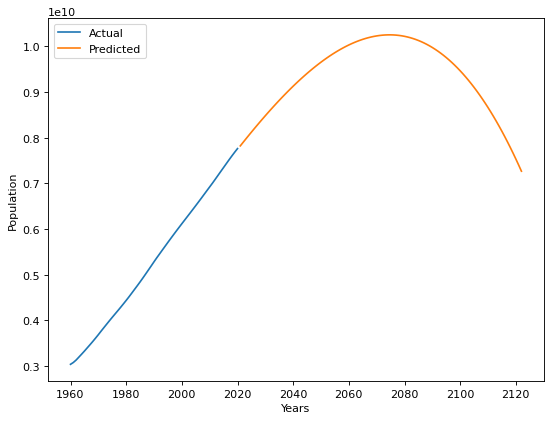

In [31]:
trained_years = list(range(1960, 2021))
predicted_years = list(range(2021, 2123))
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(trained_years, world_data, label='Actual')
plt.plot(predicted_years, predicted_data, label='Predicted')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Population')
plt.show()